<a href="https://colab.research.google.com/github/mlyhoops/All-Car-Info/blob/main/BS_Web_Scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [29]:
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load content from Main webpage

In [30]:
# Load the webpage content
r = requests.get("https://www.autoevolution.com/cars/")

#convert to a beautiful soup object
soup = bs(r.content)

#print out our html
#print(soup.prettify())

## Test code to find all link tags on the webpage

In [31]:
# first a tag
#first_a = soup.find("a")

# all a tags
#all_a = soup.find_all("a")
#all_a

## Get all brand names and links


In [32]:
cars = []
for car in soup.find_all('img', alt=True):
  car_names = car.find_parent("a")
  cars.append([car_names["href"], car_names["title"]])
cars

[['https://www.autoevolution.com/acura/', 'ACURA'],
 ['https://www.autoevolution.com/alfa-romeo/', 'ALFA ROMEO'],
 ['https://www.autoevolution.com/alpine/', 'ALPINE'],
 ['https://www.autoevolution.com/ariel/', 'ARIEL'],
 ['https://www.autoevolution.com/aro/', 'ARO'],
 ['https://www.autoevolution.com/aston-martin/', 'ASTON MARTIN'],
 ['https://www.autoevolution.com/audi/', 'AUDI'],
 ['https://www.autoevolution.com/bentley/', 'BENTLEY'],
 ['https://www.autoevolution.com/bmw/', 'BMW'],
 ['https://www.autoevolution.com/bristol/', 'BRISTOL'],
 ['https://www.autoevolution.com/bufori/', 'BUFORI'],
 ['https://www.autoevolution.com/bugatti/', 'BUGATTI'],
 ['https://www.autoevolution.com/buick/', 'BUICK'],
 ['https://www.autoevolution.com/cadillac/', 'CADILLAC'],
 ['https://www.autoevolution.com/caterham/', 'CATERHAM'],
 ['https://www.autoevolution.com/chevrolet/', 'CHEVROLET'],
 ['https://www.autoevolution.com/chrysler/', 'CHRYSLER'],
 ['https://www.autoevolution.com/citroen/', 'CITROEN'],
 ['h

## Grab all vehicles from each brand and load into a Pandas DataFrame 


In [35]:
def get_links(soup):
  for link in soup.find_all('h4'):
    car_links = link.find_parent('a')
    links.append(car_links["href"])

def add_df_prod(car_names, TF):
  for each in car_names: 
        car_link = each.find_parent("a")
        vehicle.append(each.get_text().replace(cars[i][1], ""))
        brand.append(cars[i][1])
        in_prod.append(TF)

def get_all_cars(one):
  x = one.find_next_sibling("div")
  car_names = (x.find_all("h4"))
  return car_names

(Remove break statement to run query on all car models)

In [37]:
import pandas as pd 
#Create a DataFrame to hold all the brands and vehicles
brand = []
vehicle = []
in_prod = []
links = []


# Load the webpage content
for i, car in enumerate(cars):
  r = requests.get(str(cars[i][0]))
  # Convert to a beautiful soup object
  soup = bs(r.content)

  # Find all links to every car
  get_links(soup)

  prod_or_not = soup.find_all('div', attrs={"class":"carpages"})

  #brand.append(cars[i][1])
  # Check if car is in production or not
  for one in prod_or_not:
    # If in production, print all in production
    if (one.get_text() == "production models: sort:yearname"):
      car_names = get_all_cars(one)
      add_df_prod(car_names, True)
    # If discontinued, print all discontinued
    elif (one.get_text() == "discontinued models: sort:yearname"):
      car_names = get_all_cars(one)
      add_df_prod(car_names, False)

  # Comment out break if you want to iterate through all cars (It will be slow
  # as the algorithm is currently O(n^3) and there are over 2000 items to grab.)
  break

  #for each in car_title: 
      #  car_link = each.find_parent("a")
      #  #print(car_link)
      #  print (str(each.get_text()))
      #  print(car_link["href"])
df1 = pd.DataFrame()
df1["Brand"] = brand
df1["Vehicle"] = vehicle
df1["In Production"] = in_prod
df1["Links"] = links
df1


,Brand,Vehicle,In Production,Links
0,ACURA,TLX,True,https://www.autoevolution.com/acura/tlx/
1,ACURA,ILX,True,https://www.autoevolution.com/acura/ilx/
2,ACURA,RDX,True,https://www.autoevolution.com/acura/rdx/
3,ACURA,RLX,True,https://www.autoevolution.com/acura/rlx/
4,ACURA,MDX,True,https://www.autoevolution.com/acura/mdx/
...,...,...,...,...
2623,ZENDER,Straight 8,False,https://www.autoevolution.com/zender/straight-8/
2624,ZENDER,Thirty 7,False,https://www.autoevolution.com/zender/thirty-7/
2625,Zenvo,TS1,True,https://www.autoevolution.com/zenvo/ts1/
2626,Zenvo,TSR-S,True,https://www.autoevolution.com/zenvo/tsr-s/


In [7]:
#import google drive and mount the notebook to the drive
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [155]:
# Write the DataFrame to a csv file in google drive
df.to_csv("/drive/My Drive/Colab Notebooks/Car DataFrame/All_Production_Cars.csv")

In [156]:
# Get DataFrame from the csv file
df = pd.read_csv("/drive/My Drive/Colab Notebooks/Car DataFrame/All_Production_Cars.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
for col in df["In Production"]:
  df['In Production'] = df['In Production'].replace([True],'In Production')
  df['In Production'] = df['In Production'].replace([False],'Discontinued')
  
df.head(30)

,Brand,Vehicle,In Production,Links
0,ACURA,TLX,In Production,https://www.autoevolution.com/acura/tlx/
1,ACURA,ILX,In Production,https://www.autoevolution.com/acura/ilx/
2,ACURA,RDX,In Production,https://www.autoevolution.com/acura/rdx/
3,ACURA,RLX,In Production,https://www.autoevolution.com/acura/rlx/
4,ACURA,MDX,In Production,https://www.autoevolution.com/acura/mdx/
5,ACURA,NSX,In Production,https://www.autoevolution.com/acura/nsx-1/
6,ACURA,CL,Discontinued,https://www.autoevolution.com/acura/cl/
7,ACURA,Integra Coupe,Discontinued,https://www.autoevolution.com/acura/integra-co...
8,ACURA,Integra Sedan,Discontinued,https://www.autoevolution.com/acura/integra-se...
9,ACURA,Legend,Discontinued,https://www.autoevolution.com/acura/legend/


# Plot the sum of all the car models for each manufacturer

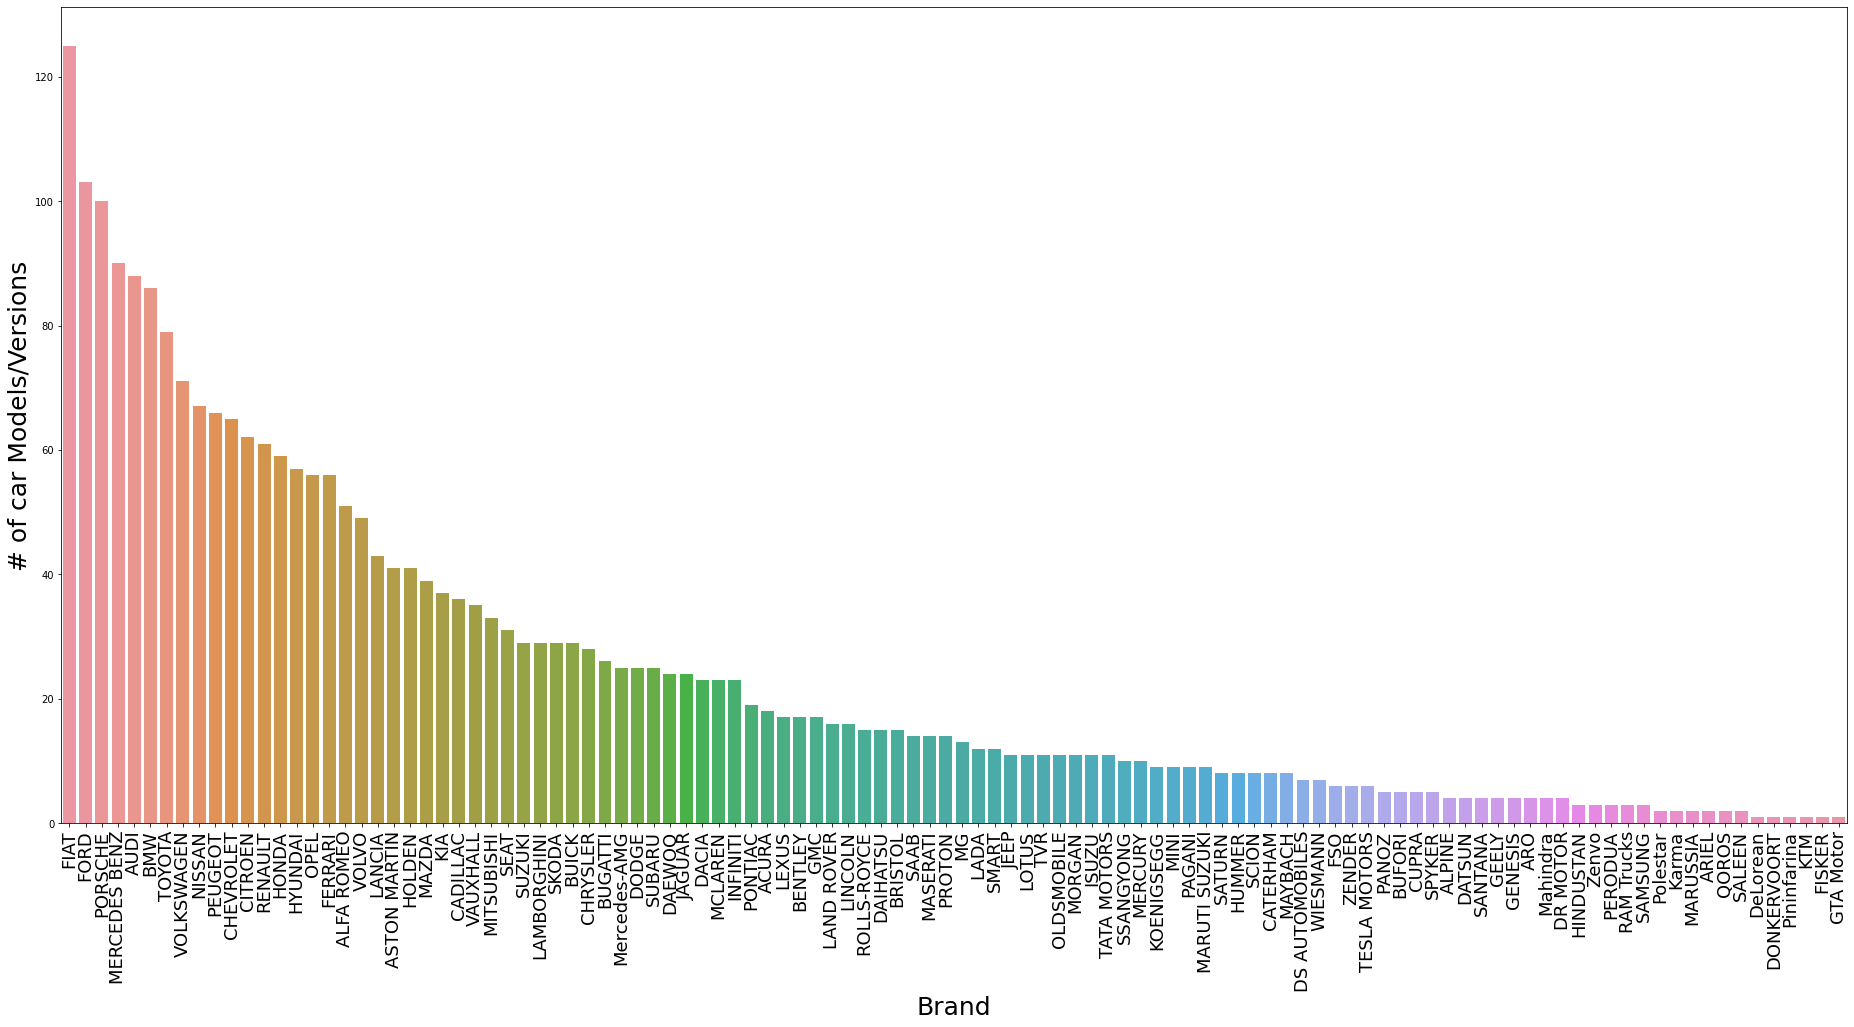

In [40]:
plt.figure(figsize=(32,18))
sns.countplot(x = df["Brand"],order = df['Brand'].value_counts().index)
plt.xticks(rotation=90, fontsize=18)
plt.xlabel("Brand", fontsize = 25)
plt.ylabel("# of car Models/Versions", fontsize = 25)
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig("/drive/My Drive/Colab Notebooks/Car DataFrame/All_Production_Cars.png")

#Plot the Number of cars In Production and the Number of cars that are Discontinued for each manufacturer

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


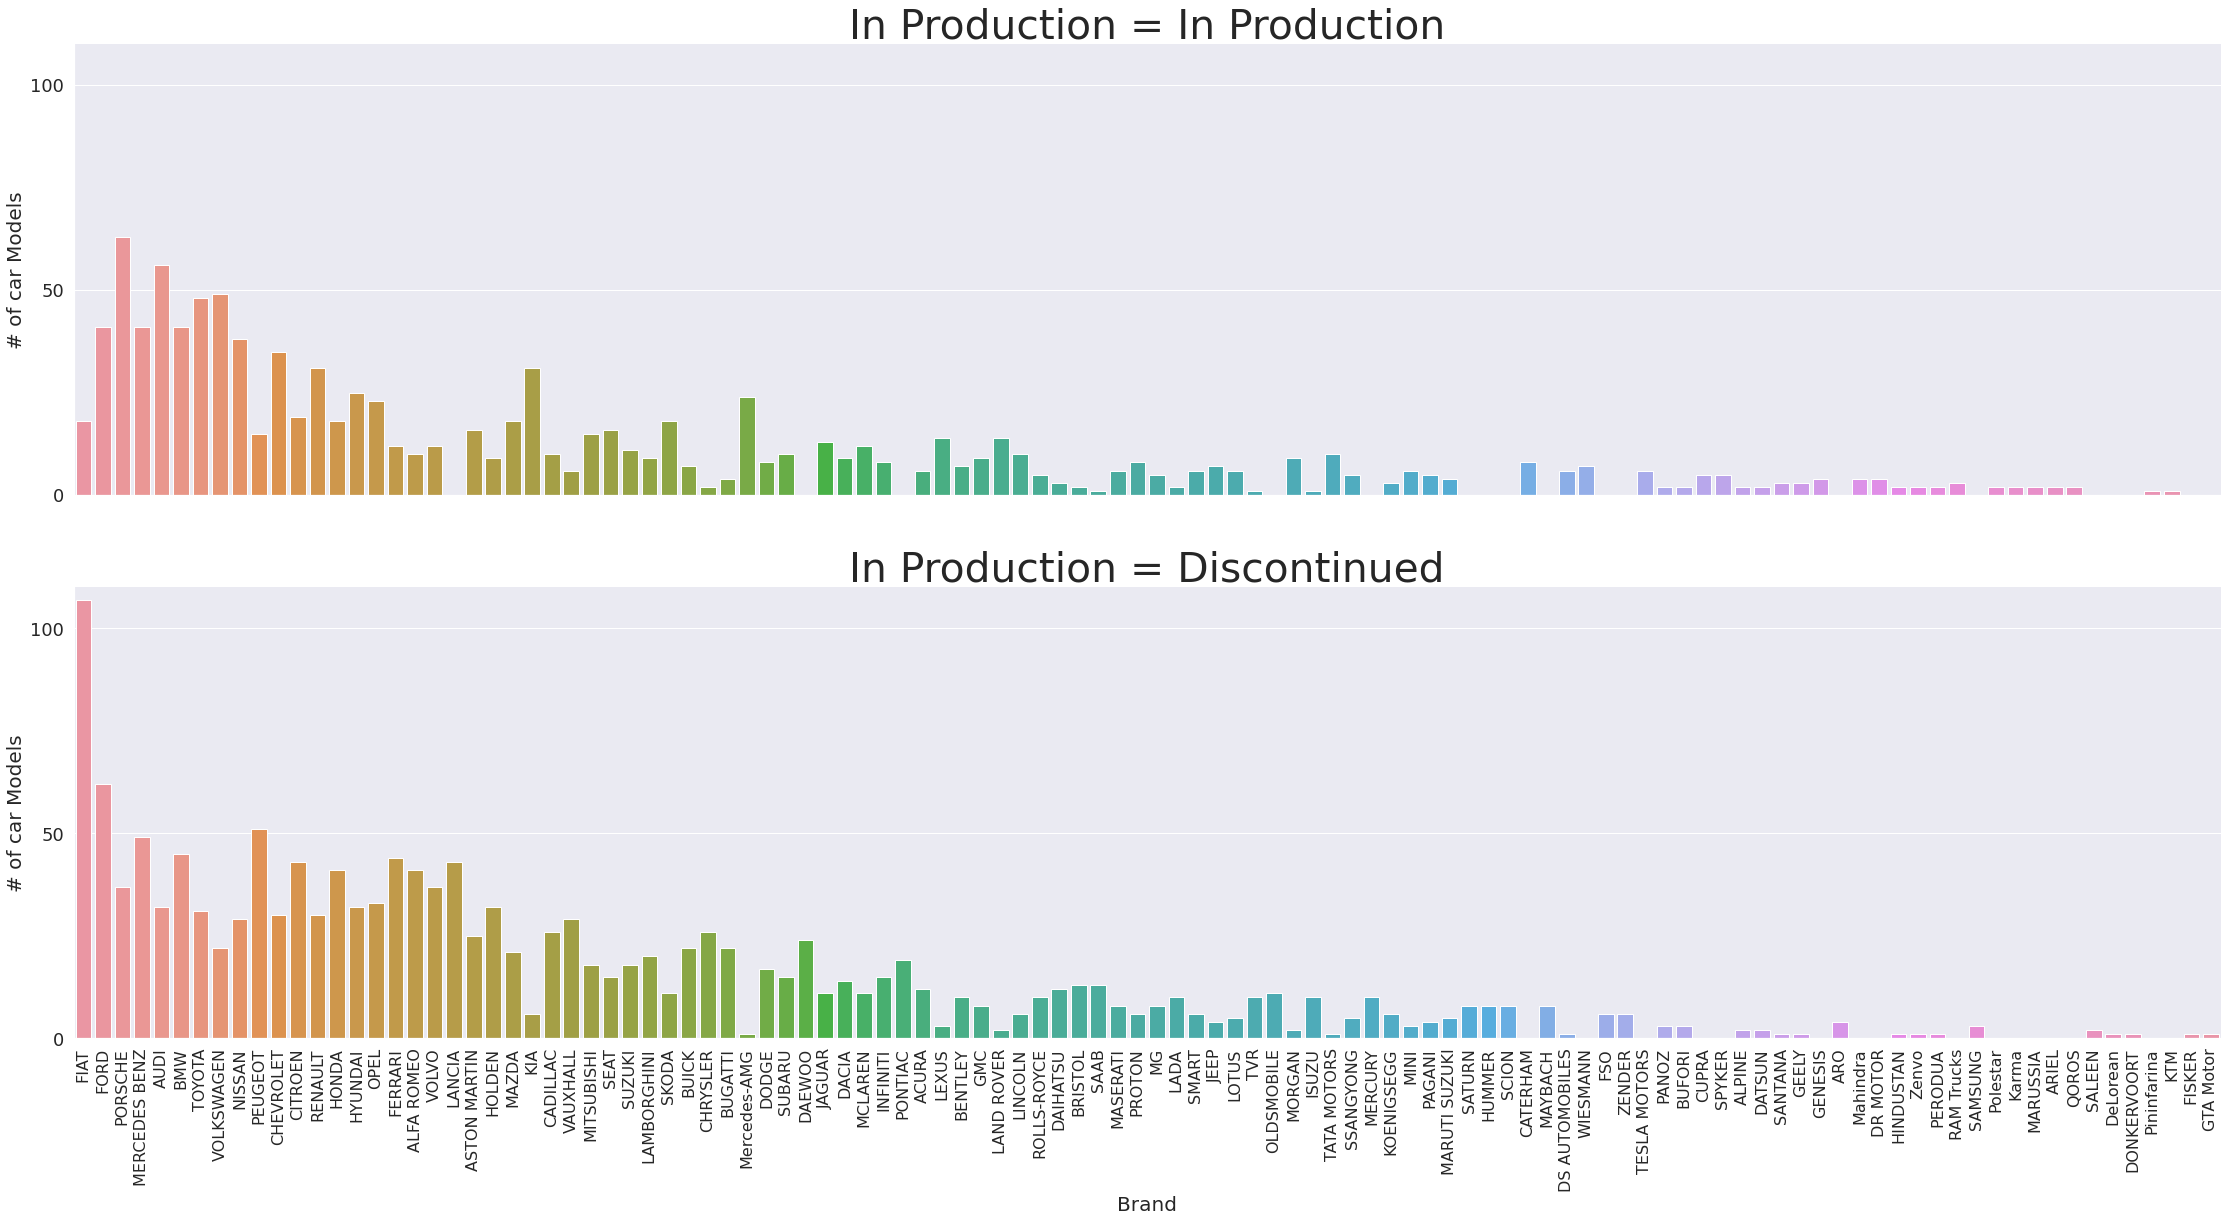

In [154]:
chart = sns.catplot(x="Brand", data=df, kind="count", row="In Production",order = df['Brand'].value_counts().index)
(chart.set_axis_labels("Brand", "# of car Models", fontsize= 20)
  .set_xticklabels(rotation=90, fontsize=16)
  .set_yticklabels(fontsize=18))  
chart.fig.set_size_inches(32,18)
chart.set(ylim=(0,110))
plt.tight_layout()
plt.savefig("/drive/My Drive/Colab Notebooks/Car DataFrame/Cars_In_Production_Or_Not.png")

In [ ]:
|